In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
crime = pd.read_csv('./Data/crime_dataset_india.csv')

In [3]:
crime.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


CRIMES BY YEAR AND MONTH


In [4]:
crime['Year'] = pd.to_datetime(crime['Date of Occurrence']).dt.year
crime['Month'] = pd.to_datetime(crime['Date of Occurrence']).dt.month
crime.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Year,Month
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN,2020,1
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN,2020,1
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN,2020,1
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00,2020,1
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00,2020,1


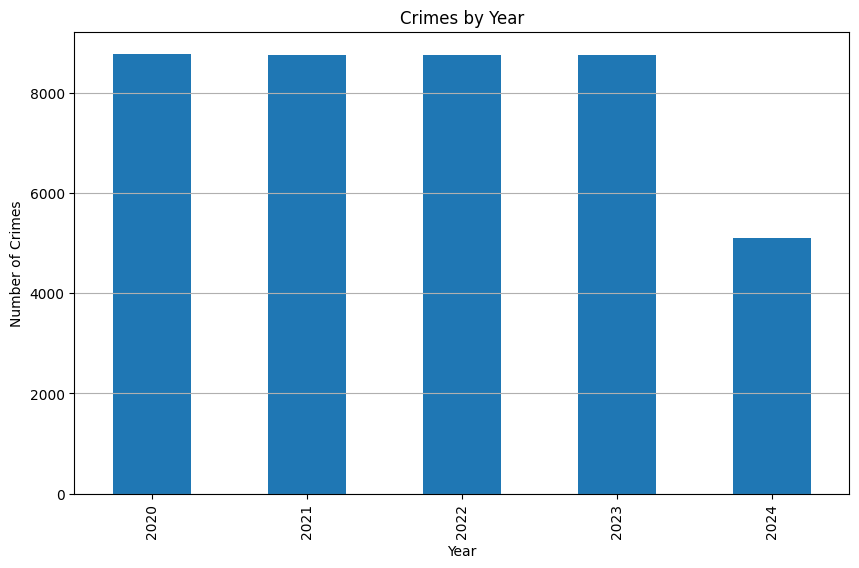

In [5]:
yearly_crimes = crime.groupby('Year').size()


plt.figure(figsize=(10,6))
yearly_crimes.plot(kind = 'bar')
plt.title('Crimes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(axis = 'y')
plt.show()

In [6]:
max_year = yearly_crimes.idxmax()
max_value = yearly_crimes.max()

min_year = yearly_crimes.idxmin()
min_value = yearly_crimes.min()

print(f"Year with maximum crimes: {max_year} ({max_value} crimes)")
print(f"Year with minimum crimes: {min_year} ({min_value} crimes)")


Year with maximum crimes: 2020 (8784 crimes)
Year with minimum crimes: 2024 (5096 crimes)


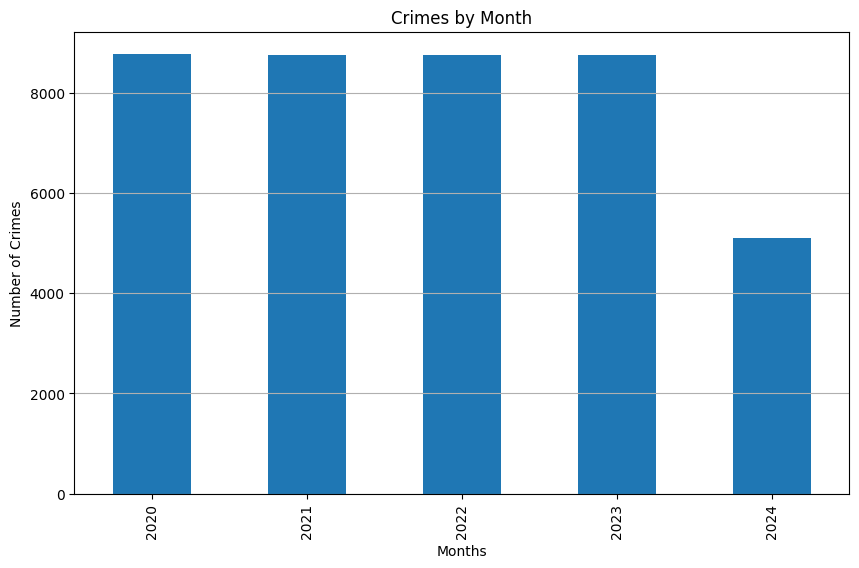

In [7]:
monthly_crimes = crime.groupby('Month').size()

plt.figure(figsize=(10,6))
yearly_crimes.plot(kind = 'bar')
plt.title('Crimes by Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')
plt.grid(axis = 'y')
plt.show()

In [8]:
max_month = monthly_crimes.idxmax()
max_val = monthly_crimes.max()

min_month = monthly_crimes.idxmin()
min_val = monthly_crimes.min()

list_month = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEPT','OCT','NOV','DEC']

max_month_name = list_month[max_month - 1]
min_month_name = list_month[min_month - 1]

print(f"Month with maximum crimes: {max_month_name} ({max_val} crimes)")
print(f"Month with minimum crimes: {min_month_name} ({min_val} crimes)")

Month with maximum crimes: JAN (3720 crimes)
Month with minimum crimes: SEPT (2880 crimes)


In [9]:
crime.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Year,Month
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN,2020,1
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN,2020,1
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN,2020,1
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00,2020,1
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00,2020,1


CRIMES BY TIME OF DAY

In [10]:
def categorize_time_of_day(time_str):
    try:
        hour = int(time_str.split(':')[0].split(' ')[-1])
        if 5 <= hour < 12:
            return 'Morning'
        elif 12 <= hour < 17:
            return 'Afternoon'
        elif 17 <= hour < 21:
            return 'Evening'
        else:
            return 'Night'
    except:
        return 'Unknown'

crime['Time Category'] = crime['Time of Occurrence'].apply(categorize_time_of_day)
time_counts = crime['Time Category'].value_counts()
time_counts


Time Category
Night        13278
Morning      11768
Afternoon     8301
Evening       6813
Name: count, dtype: int64

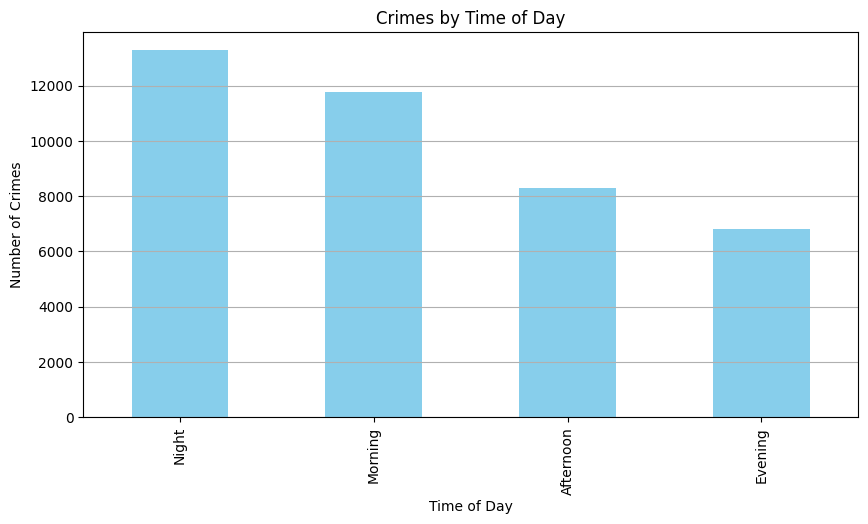

In [11]:
plt.figure(figsize=(10,5))
time_counts.plot(kind='bar',color='skyblue')
plt.title('Crimes by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Crimes')
plt.grid(axis = 'y')
plt.show()

In [12]:
time_category_max_crime = time_counts.idxmax()
max_amount_crimes = time_counts.max()

time_category_min_crime = time_counts.idxmin()
min_amount_crimes = time_counts.min()

print(f"most amount of crime happens at {time_category_max_crime} about ({max_amount_crimes} crimes)")
print(f"min amount of crime happens at {time_category_min_crime} about ({min_amount_crimes} crimes)")

most amount of crime happens at Night about (13278 crimes)
min amount of crime happens at Evening about (6813 crimes)


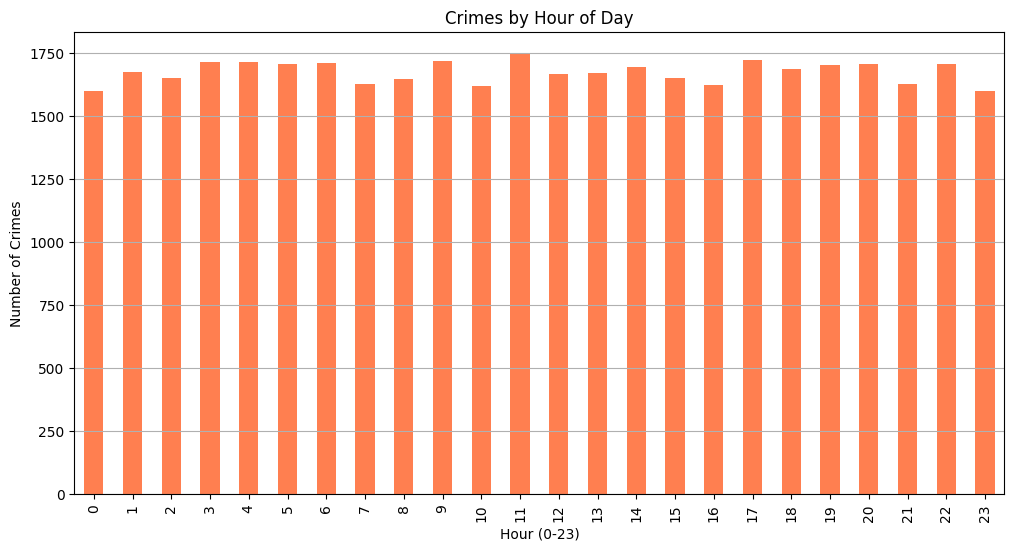

Peak crime hour: 11:00 with 1745 crimes
Peak crime hour: 0:00 with 1599 crimes


In [13]:
crime['Hour'] = crime['Time of Occurrence'].apply(lambda x: int(x.split(':')[0].split(' ')[-1]) if pd.notnull(x) else None)
hour_counts = crime['Hour'].value_counts().sort_index()

plt.figure(figsize=(12,6))
hour_counts.plot(kind='bar', color='coral')
plt.title('Crimes by Hour of Day')
plt.xlabel('Hour (0-23)')
plt.ylabel('Number of Crimes')
plt.grid(axis='y')
plt.show()

peak_hour = hour_counts.idxmax()
peak_count = hour_counts.max()

least_hour = hour_counts.idxmin()
least_count = hour_counts.min()

print(f"Peak crime hour: {peak_hour}:00 with {peak_count} crimes")
print(f"Peak crime hour: {least_hour}:00 with {least_count} crimes")

top and least cities by reported crimes

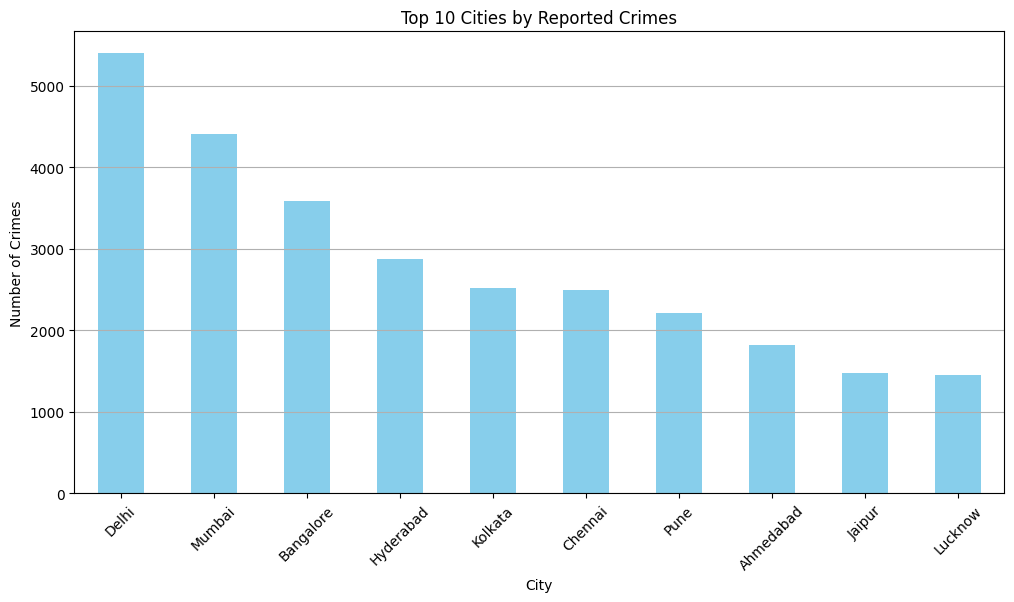

the city with most crime is Delhi with (5400 crimes)


In [14]:
top_cities = crime['City'].value_counts().head(10)
plt.figure(figsize=(12,6))
top_cities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities by Reported Crimes')
plt.xlabel('City')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

most_crime = top_cities.idxmax()
amount = top_cities.max()
print(f"the city with most crime is {most_crime} with ({amount} crimes)")

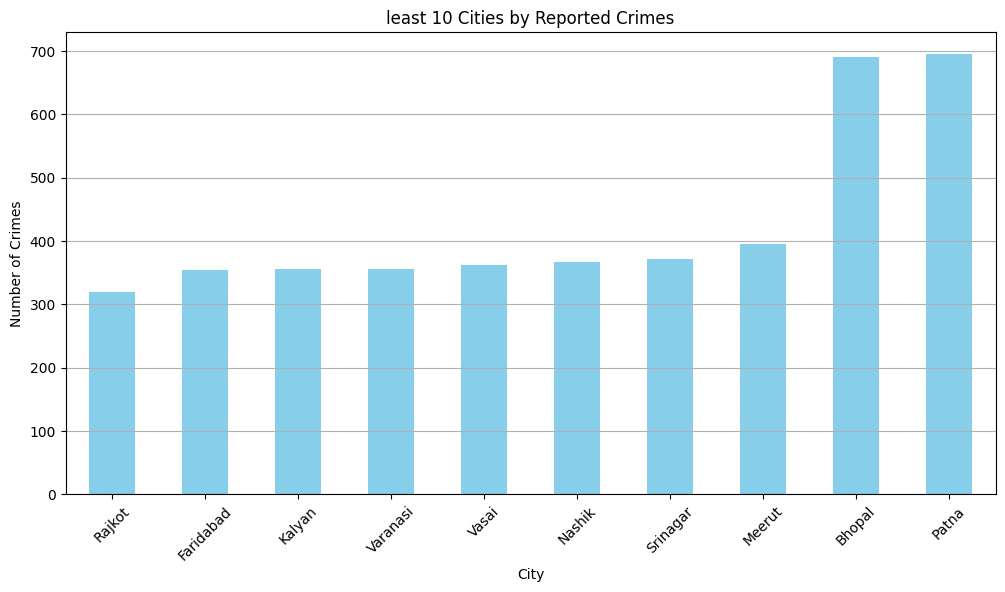

the city with least crime is Rajkot with (320 crimes)


In [15]:
least_cities = crime['City'].value_counts().sort_values(ascending=True).head(10)

plt.figure(figsize=(12,6))
least_cities.plot(kind='bar', color='skyblue')
plt.title('least 10 Cities by Reported Crimes')
plt.xlabel('City')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

least_crime = least_cities.idxmin()
amount = least_cities.min()
print(f"the city with least crime is {least_crime} with ({amount} crimes)")

City vs Case Closure Rate

In [16]:
crime = pd.read_csv('./Data/crime_dataset_india.csv')

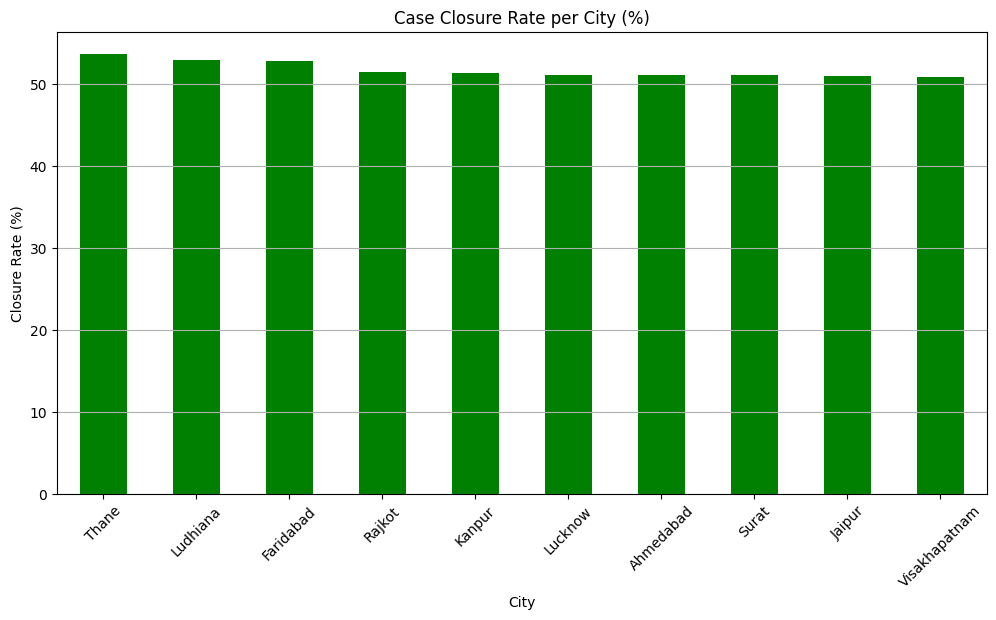

In [17]:
crime['Case Closed'] = crime['Case Closed'].map({'Yes':1,'No':0})
closure_rate = crime.groupby('City')['Case Closed'].mean()*100

closure_rate = closure_rate.sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
closure_rate.plot(kind='bar', color='green')

plt.title('Case Closure Rate per City (%)')
plt.xlabel('City')
plt.ylabel('Closure Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [18]:
best_closure = closure_rate.idxmax()
best_closure_percent = closure_rate.max().round(2)
print(f"city with best closure rate is {best_closure} with {best_closure_percent} %")

city with best closure rate is Thane with 53.68 %


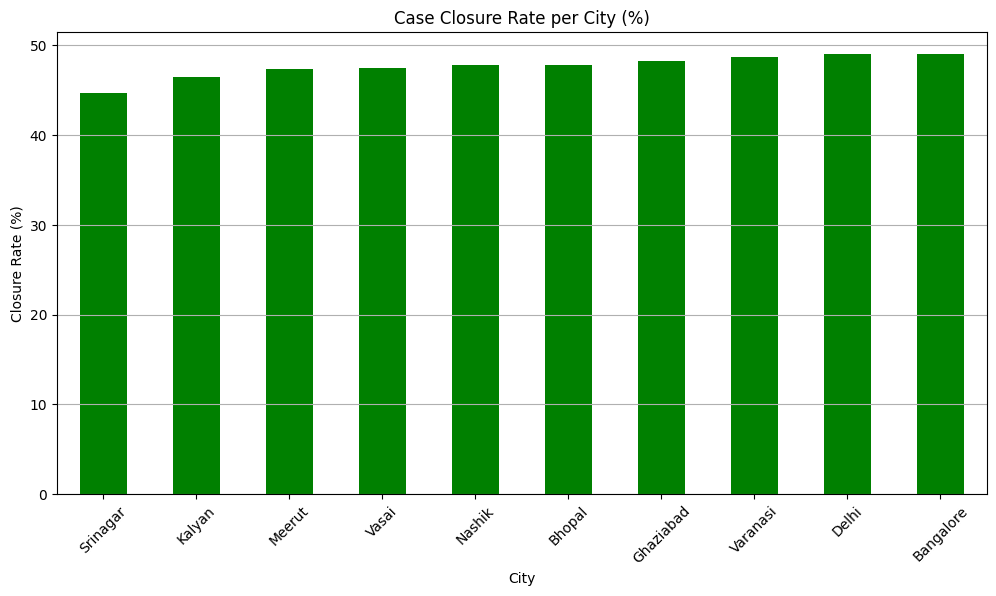

In [19]:
closure_rate = crime.groupby('City')['Case Closed'].mean()*100

closure_rate = closure_rate.sort_values(ascending=True).head(10)

plt.figure(figsize=(12,6))
closure_rate.plot(kind='bar', color='green')

plt.title('Case Closure Rate per City (%)')
plt.xlabel('City')
plt.ylabel('Closure Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [20]:
least_closure = closure_rate.idxmin()
least_closure_percent = closure_rate.min().round(2)
print(f"city with least closure rate is {least_closure} with {least_closure_percent} %")

city with least closure rate is Srinagar with 44.74 %


Most common crimes

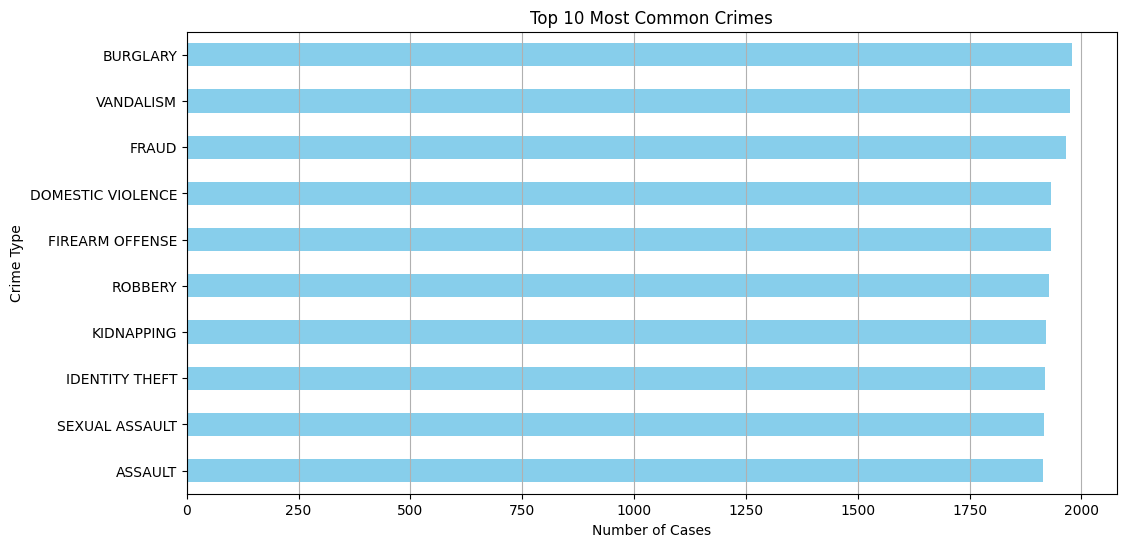

In [21]:
crime_counts = crime['Crime Description'].value_counts().head(10)

plt.figure(figsize=(12,6))
crime_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title("Top 10 Most Common Crimes")
plt.xlabel("Number of Cases")
plt.ylabel("Crime Type")
plt.grid(axis = 'x')
plt.show()

In [22]:
most_crime = crime_counts.idxmax()
most_crime_value = crime_counts.max()

print(f"the most committed crime is {most_crime} with a total of ({most_crime_value} crimes)")

the most committed crime is BURGLARY with a total of (1980 crimes)


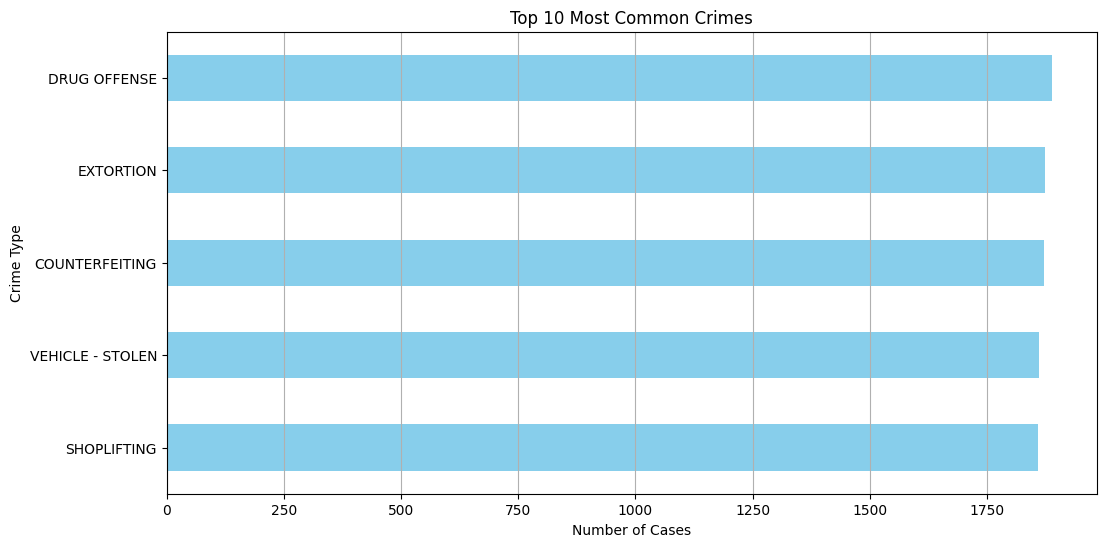

In [23]:
crime_counts = crime['Crime Description'].value_counts().tail()
plt.figure(figsize=(12,6))
crime_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title("Top 10 Most Common Crimes")
plt.xlabel("Number of Cases")
plt.ylabel("Crime Type")
plt.grid(axis = 'x')
plt.show()

In [24]:
least_crime = crime_counts.idxmin()
least_crime_value = crime_counts.min()

print(f"the most committed crime is {least_crime} with a total of ({least_crime_value} crimes)")

the most committed crime is SHOPLIFTING with a total of (1859 crimes)


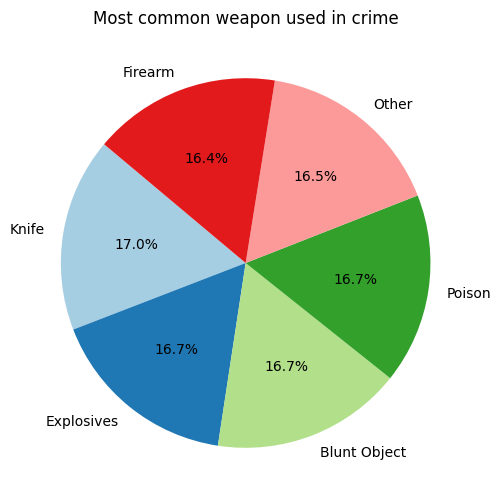

In [28]:
weapons_count = crime['Weapon Used'].value_counts().head(10)

plt.figure(figsize=(10,6))
weapons_count.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.ylabel('')
plt.title('Most common weapon used in crime')
plt.show()

In [33]:
famous_weapon = weapons_count.idxmax()
famous_weapon_value = weapons_count.max()
total_weapon = weapons_count.sum()

percentage_count = (famous_weapon_value/total_weapon)*100
percentage_count = percentage_count.round(2)
print(f"the most used weapon is {famous_weapon} with its percentage being {percentage_count}")

the most used weapon is Knife with its percentage being 16.98


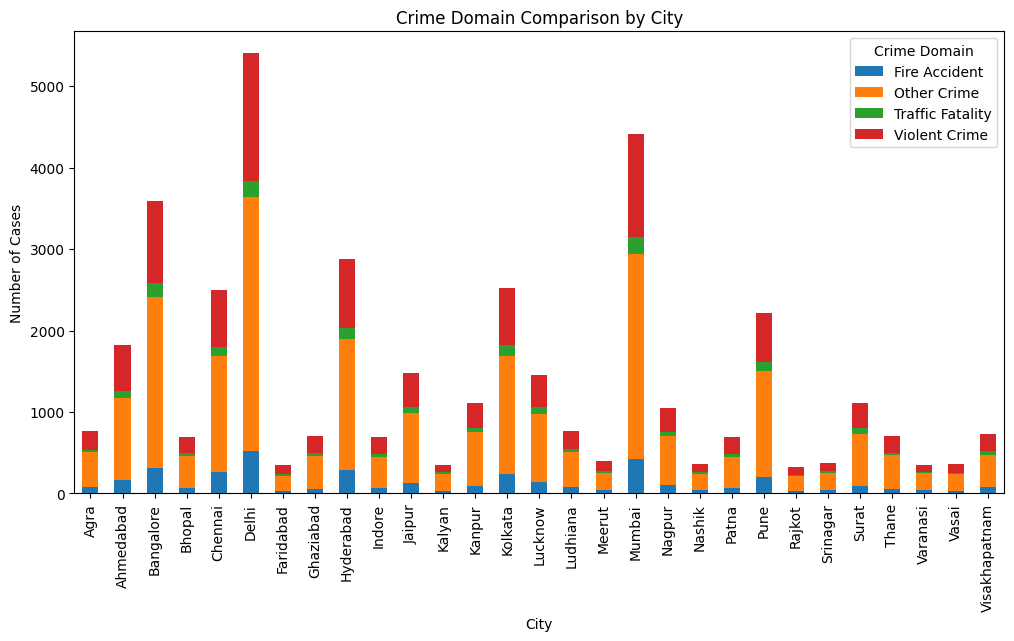

In [38]:
domain_city_counts = crime.groupby(['City', 'Crime Domain']).size().unstack(fill_value=0)

domain_city_counts.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Crime Domain Comparison by City")
plt.xlabel("City")
plt.ylabel("Number of Cases")
plt.legend(title="Crime Domain")
plt.show()

 Victim Age Distribution

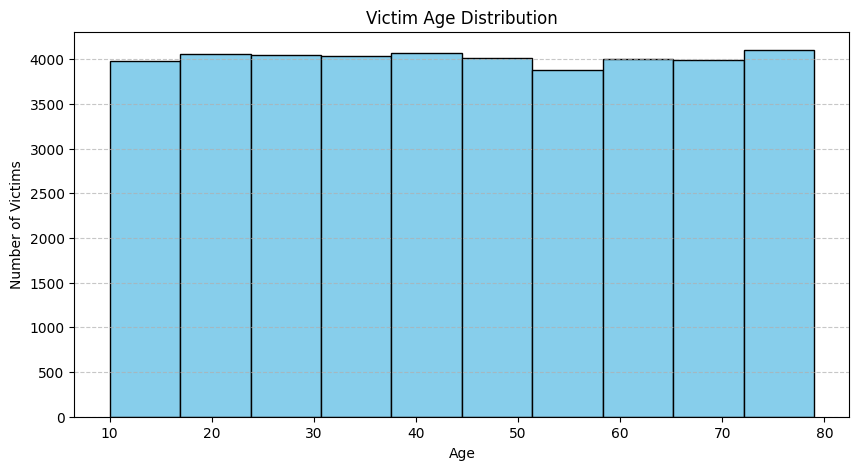

In [50]:
plt.figure(figsize=(10, 5))
plt.hist(crime['Victim Age'].dropna(), bins=10, edgecolor='black', color='skyblue')
plt.title('Victim Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Victims')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

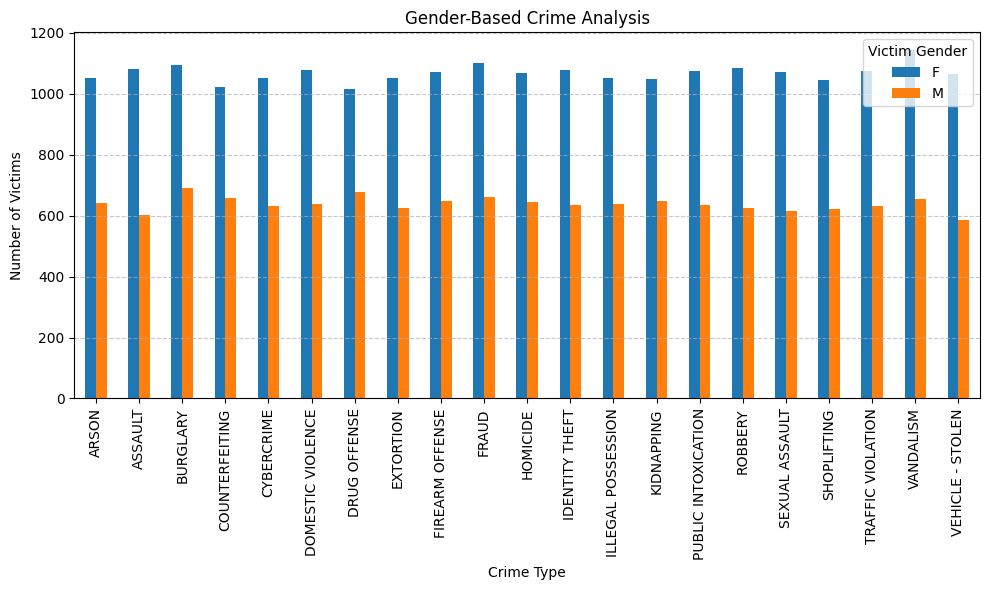

In [53]:
crime_gender_clean = crime[crime['Victim Gender'].isin(['F', 'M'])]

gender_crime = crime_gender_clean.groupby(['Crime Description', 'Victim Gender']).size().unstack(fill_value=0)

gender_crime.plot(kind='bar', figsize=(10, 6))
plt.title('Gender-Based Crime Analysis')
plt.xlabel('Crime Type')
plt.ylabel('Number of Victims')
plt.xticks(rotation=90)
plt.legend(title='Victim Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The graph clearly shows that the most effected gender(victims) are the females